In [908]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import json
import math
import seaborn as sns
import matplotlib.pyplot as plt

# membaca file csv
df = pd.read_csv("10data.csv")
# menampilkan seluruh kolom yang tersedia
pd.set_option('display.max_columns', None)
df.head(10)

,link,title,category,address,open_hours,popular_times,website,phone,plus_code,review_count,review_rating,reviews_per_rating,latitude,longitude,cid,status,reviews_link,thumbnail,timezone,data_id,images,order_online,menu,owner,complete_address,about,user_reviews
0,https://www.google.com/maps/place/Hade+Laundry...,Hade Laundry,Laundry service,"Jl. Maskumambang No.11, Turangga, Bandung, Ban...","{""Friday"":[""8 AM–5 PM""],""Monday"":[""8 AM–5 PM""]...","{""Friday"":{""10"":77,""11"":95,""12"":85,""13"":90,""14...",https://linktr.ee/HADELAUNDRYINDONESIA,(022) 7322334,"3J8G+8Q Turangga, Bandung City, West Java",20,4.3,"{""1"":3,""2"":0,""3"":0,""4"":2,""5"":15}",-6.934192,107.626997,12645734774640026531,Closed ⋅ Opens 8 AM Tue,https://search.google.com/local/reviews?placei...,https://lh5.googleusercontent.com/p/AF1QipPpip...,Asia/Jakarta,0x2e68e87c7397af79:0xaf7eacc70e3923a3,"[{""title"":""All"",""image"":""https://lh5.googleuse...",NaN,"{""link"":"""",""source"":""""}","{""id"":""107304465956003013841"",""name"":""Hade Lau...","{""borough"":""Turangga, Bandung"",""street"":""Jl. M...",NaN,"[{""Name"":""Sintaa Raka"",""ProfilePicture"":""https..."
1,https://www.google.com/maps/place/Chingu+Laund...,Chingu Laundry Express,Laundry service,"Jl. Boscha No.12, Pasteur, Sukajadi, Bandung C...","{""Friday"":[""7 AM–8 PM""],""Monday"":[""7 AM–8 PM""]...","{""Friday"":{""10"":64,""11"":58,""12"":76,""13"":88,""14...",http://chingu-laundry.com/,0851-7445-0012,"4J62+8G Pasteur, Bandung City, West Java",253,4.9,"{""1"":4,""2"":0,""3"":0,""4"":2,""5"":247}",-6.889136,107.601356,8281128176986028577,Closed ⋅ Opens 7 AM Tue,https://search.google.com/local/reviews?placei...,https://lh5.googleusercontent.com/p/AF1QipOEnb...,Asia/Jakarta,0x2e68e7eb6d62478f:0x72ec7a33a0bafa21,"[{""title"":""All"",""image"":""https://lh5.googleuse...",NaN,"{""link"":"""",""source"":""""}","{""id"":""112691187250804597569"",""name"":""Chingu L...","{""borough"":""Pasteur, Sukajadi"",""street"":""Jl. B...",NaN,"[{""Name"":""Dian Herdiana"",""ProfilePicture"":""htt..."
2,https://www.google.com/maps/place/Laundry+Send...,Laundry Sendiri,Laundry service,"Jl. Margasari No.28, Margasari, Buahbatu, Band...","{""Friday"":[""6 AM–9 PM""],""Monday"":[""6 AM–9 PM""]...","{""Friday"":{""10"":60,""11"":80,""12"":76,""13"":56,""14...",https://instagram.com/laundrysendiri,0821-2128-1878,"2MV4+6M Margasari, Bandung City, West Java",18,4.9,"{""1"":0,""2"":0,""3"":0,""4"":2,""5"":16}",-6.956888,107.656647,11883527521528499544,Closed ⋅ Opens 6 AM Tue,https://search.google.com/local/reviews?placei...,https://lh5.googleusercontent.com/p/AF1QipMlxf...,Asia/Jakarta,0x2e68e9e3dd7a6079:0xa4eac551b748cd58,"[{""title"":""All"",""image"":""https://lh5.googleuse...",NaN,"{""link"":"""",""source"":""""}","{""id"":""112258814562827350770"",""name"":""Laundry ...","{""borough"":""Margasari, Buahbatu"",""street"":""Jl....","[{""id"":""service_options"",""name"":""Service optio...","[{""Name"":""Meita Surya"",""ProfilePicture"":""https..."
3,https://www.google.com/maps/place/Kingwash+Lau...,Kingwash Laundry,Laundry service,"Jl. Phh. Mustofa No.127D, Sukapada, Cibeunying...","{""Friday"":[""7 AM–7 PM""],""Monday"":[""7 AM–7 PM""]...","{""Friday"":{""10"":46,""11"":42,""12"":57,""13"":73,""14...",https://bit.ly/2E6i49Z,0813-5000-6203,"3JXX+C2 Sukapada, Bandung City, West Java",87,5.0,"{""1"":0,""2"":0,""3"":0,""4"":1,""5"":86}",-6.901418,107.647619,12993072108322528099,Closed ⋅ Opens 7 AM Tue,https://search.google.com/local/reviews?placei...,https://lh5.googleusercontent.com/p/AF1QipNmYM...,Asia/Jakarta,0x2e68e7a50e258f41:0xb450aa3e05999b63,"[{""title"":""All"",""image"":""https://lh5.googleuse...",NaN,"{""link"":"""",""source"":""""}","{""id"":""101218026606389470814"",""name"":""Kingwash...","{""borough"":""Sukapada, Cibeunying Kidul"",""stree...","[{""id"":""service_options"",""name"":""Service optio...","[{""Name"":""Wawah Sri"",""ProfilePicture"":""https:/..."
4,https://www.google.com/maps/place/Waro

In [909]:
# hapus kolom yang tidak sesuai dengan kriteria
kolom_tidak_diperlukan = [
    'link',       
    'status',     
    'thumbnail',  
    'timezone',   
    'data_id',    
    'images',     
    'order_online',   
    'menu',
    'about',
    'category',
    'address',
    'user_reviews',
    'complete_address',
    'reviews_link',
    'owner',
    'cid'
]
df_cleaned = df.drop(columns=kolom_tidak_diperlukan)
df_cleaned.head(10)

,title,open_hours,popular_times,website,phone,plus_code,review_count,review_rating,reviews_per_rating,latitude,longitude
0,Hade Laundry,"{""Friday"":[""8 AM–5 PM""],""Monday"":[""8 AM–5 PM""]...","{""Friday"":{""10"":77,""11"":95,""12"":85,""13"":90,""14...",https://linktr.ee/HADELAUNDRYINDONESIA,(022) 7322334,"3J8G+8Q Turangga, Bandung City, West Java",20,4.3,"{""1"":3,""2"":0,""3"":0,""4"":2,""5"":15}",-6.934192,107.626997
1,Chingu Laundry Express,"{""Friday"":[""7 AM–8 PM""],""Monday"":[""7 AM–8 PM""]...","{""Friday"":{""10"":64,""11"":58,""12"":76,""13"":88,""14...",http://chingu-laundry.com/,0851-7445-0012,"4J62+8G Pasteur, Bandung City, West Java",253,4.9,"{""1"":4,""2"":0,""3"":0,""4"":2,""5"":247}",-6.889136,107.601356
2,Laundry Sendiri,"{""Friday"":[""6 AM–9 PM""],""Monday"":[""6 AM–9 PM""]...","{""Friday"":{""10"":60,""11"":80,""12"":76,""13"":56,""14...",https://instagram.com/laundrysendiri,0821-2128-1878,"2MV4+6M Margasari, Bandung City, West Java",18,4.9,"{""1"":0,""2"":0,""3"":0,""4"":2,""5"":16}",-6.956888,107.656647
3,Kingwash Laundry,"{""Friday"":[""7 AM–7 PM""],""Monday"":[""7 AM–7 PM""]...","{""Friday"":{""10"":46,""11"":42,""12"":57,""13"":73,""14...",https://bit.ly/2E6i49Z,0813-5000-6203,"3JXX+C2 Sukapada, Bandung City, West Java",87,5.0,"{""1"":0,""2"":0,""3"":0,""4"":1,""5"":86}",-6.901418,107.647619
4,Waroenk Laundry Tubagus Ismail,"{""Friday"":[""7 AM–9 PM""],""Monday"":[""7 AM–9 PM""]...",{},NaN,0877-8000-8737,"4J78+WV Sekeloa, Bandung City, West Java",14,4.3,"{""1"":2,""2"":0,""3"":0,""4"":2,""5"":10}",-6.885193,107.617222
5,Laundry Express Bandung,"{""Friday"":[""8 AM–8 PM""],""Monday"":[""8 AM–8 PM""]...","{""Friday"":{""10"":55,""11"":53,""12"":67,""13"":69,""14...",http://laundryexpressbandung.com/,0851-7248-8338,"3JF5+RF Balonggede, Bandung City, West Java",401,4.9,"{""1"":5,""2"":2,""3"":0,""4"":4,""5"":390}",-6.925439,107.608687
6,RN Laundry & Dry Cleaning,"{""Friday"":[""5 AM–10 PM""],""Monday"":[""5 AM–10 PM...","{""Friday"":{""10"":12,""11"":16,""12"":29,""13"":25,""14...",https://www.instagram.com/rnlaundrybandung/,0877-2297-3480,"4JJP+2P Mekarsaluyu, Bandung Regency, West Java",11,5.0,"{""1"":0,""2"":0,""3"":0,""4"":0,""5"":11}",-6.869900,107.636782
7,Sorcha Laundry Kosambi (Laundry Antar Jemput B...,"{""Friday"":[""7 AM–8 PM""],""Monday"":[""7 AM–8 PM""]...","{""Friday"":{""10"":62,""11"":56,""12"":45,""13"":39,""14...",https://www.sorchakosambi.com/,0811-1111-2731,"3JHG+9M Samoja, Bandung City, West Java",438,5.0,"{""1"":2,""2"":0,""3"":3,""4"":2,""5"":431}",-6.921617,107.626707
8,SANY LAUNDRY PUSAT,"{""Friday"":[""7 AM–10 PM""],""Monday"":[""7 AM–10 PM...","{""Friday"":{""10"":57,""11"":28,""12"":14,""13"":0,""14""...",http://sani-laundry-ah-nasution.business.site/,(022) 7813100,"3PF8+8W Cipadung, Bandung City, West Java",21,2.7,"{""1"":11,""2"":0,""3"":2,""4"":0,""5"":8}",-6.926658,107.717269
9,Amala Express Laundry & Wet Cleaning,"{""Friday"":[""8 AM–7 PM""],""Monday"":[""8 AM–7 PM""]...","{""Friday"":{""10"":15,""11"":15,""12"":36,""13"":47,""14...",NaN,0819-0819-6626,"3JR5+8X Babakanciamis, Bandung City, West Java",72,4.9,"{""1"":1,""2"":0,""3"":1,""4"":3,""5"":67}",-6.909175,107.609894


In [910]:
df_cleaned.dtypes

title                  object
open_hours             object
popular_times          object
website                object
phone                  object
plus_code              object
review_count            int64
review_rating         float64
reviews_per_rating     object
latitude              float64
longitude             float64
dtype: object

In [911]:
df_cleaned.fillna({        
    'website': 'Tidak Ada',       
}, inplace=True)

df_cleaned.fillna(0, inplace=True)
df_cleaned.head(10)

,title,open_hours,popular_times,website,phone,plus_code,review_count,review_rating,reviews_per_rating,latitude,longitude
0,Hade Laundry,"{""Friday"":[""8 AM–5 PM""],""Monday"":[""8 AM–5 PM""]...","{""Friday"":{""10"":77,""11"":95,""12"":85,""13"":90,""14...",https://linktr.ee/HADELAUNDRYINDONESIA,(022) 7322334,"3J8G+8Q Turangga, Bandung City, West Java",20,4.3,"{""1"":3,""2"":0,""3"":0,""4"":2,""5"":15}",-6.934192,107.626997
1,Chingu Laundry Express,"{""Friday"":[""7 AM–8 PM""],""Monday"":[""7 AM–8 PM""]...","{""Friday"":{""10"":64,""11"":58,""12"":76,""13"":88,""14...",http://chingu-laundry.com/,0851-7445-0012,"4J62+8G Pasteur, Bandung City, West Java",253,4.9,"{""1"":4,""2"":0,""3"":0,""4"":2,""5"":247}",-6.889136,107.601356
2,Laundry Sendiri,"{""Friday"":[""6 AM–9 PM""],""Monday"":[""6 AM–9 PM""]...","{""Friday"":{""10"":60,""11"":80,""12"":76,""13"":56,""14...",https://instagram.com/laundrysendiri,0821-2128-1878,"2MV4+6M Margasari, Bandung City, West Java",18,4.9,"{""1"":0,""2"":0,""3"":0,""4"":2,""5"":16}",-6.956888,107.656647
3,Kingwash Laundry,"{""Friday"":[""7 AM–7 PM""],""Monday"":[""7 AM–7 PM""]...","{""Friday"":{""10"":46,""11"":42,""12"":57,""13"":73,""14...",https://bit.ly/2E6i49Z,0813-5000-6203,"3JXX+C2 Sukapada, Bandung City, West Java",87,5.0,"{""1"":0,""2"":0,""3"":0,""4"":1,""5"":86}",-6.901418,107.647619
4,Waroenk Laundry Tubagus Ismail,"{""Friday"":[""7 AM–9 PM""],""Monday"":[""7 AM–9 PM""]...",{},Tidak Ada,0877-8000-8737,"4J78+WV Sekeloa, Bandung City, West Java",14,4.3,"{""1"":2,""2"":0,""3"":0,""4"":2,""5"":10}",-6.885193,107.617222
5,Laundry Express Bandung,"{""Friday"":[""8 AM–8 PM""],""Monday"":[""8 AM–8 PM""]...","{""Friday"":{""10"":55,""11"":53,""12"":67,""13"":69,""14...",http://laundryexpressbandung.com/,0851-7248-8338,"3JF5+RF Balonggede, Bandung City, West Java",401,4.9,"{""1"":5,""2"":2,""3"":0,""4"":4,""5"":390}",-6.925439,107.608687
6,RN Laundry & Dry Cleaning,"{""Friday"":[""5 AM–10 PM""],""Monday"":[""5 AM–10 PM...","{""Friday"":{""10"":12,""11"":16,""12"":29,""13"":25,""14...",https://www.instagram.com/rnlaundrybandung/,0877-2297-3480,"4JJP+2P Mekarsaluyu, Bandung Regency, West Java",11,5.0,"{""1"":0,""2"":0,""3"":0,""4"":0,""5"":11}",-6.869900,107.636782
7,Sorcha Laundry Kosambi (Laundry Antar Jemput B...,"{""Friday"":[""7 AM–8 PM""],""Monday"":[""7 AM–8 PM""]...","{""Friday"":{""10"":62,""11"":56,""12"":45,""13"":39,""14...",https://www.sorchakosambi.com/,0811-1111-2731,"3JHG+9M Samoja, Bandung City, West Java",438,5.0,"{""1"":2,""2"":0,""3"":3,""4"":2,""5"":431}",-6.921617,107.626707
8,SANY LAUNDRY PUSAT,"{""Friday"":[""7 AM–10 PM""],""Monday"":[""7 AM–10 PM...","{""Friday"":{""10"":57,""11"":28,""12"":14,""13"":0,""14""...",http://sani-laundry-ah-nasution.business.site/,(022) 7813100,"3PF8+8W Cipadung, Bandung City, West Java",21,2.7,"{""1"":11,""2"":0,""3"":2,""4"":0,""5"":8}",-6.926658,107.717269
9,Amala Express Laundry & Wet Cleaning,"{""Friday"":[""8 AM–7 PM""],""Monday"":[""8 AM–7 PM""]...","{""Friday"":{""10"":15,""11"":15,""12"":36,""13"":47,""14...",Tidak Ada,0819-0819-6626,"3JR5+8X Babakanciamis, Bandung City, West Java",72,4.9,"{""1"":1,""2"":0,""3"":1,""4"":3,""5"":67}",-6.909175,107.609894


In [912]:
df_cleaned.isna().sum()

title                 0
open_hours            0
popular_times         0
website               0
phone                 0
plus_code             0
review_count          0
review_rating         0
reviews_per_rating    0
latitude              0
longitude             0
dtype: int64

In [913]:
# Memeriksa tipe data setiap kolom
df_cleaned.dtypes

title                  object
open_hours             object
popular_times          object
website                object
phone                  object
plus_code              object
review_count            int64
review_rating         float64
reviews_per_rating     object
latitude              float64
longitude             float64
dtype: object

In [914]:
df.describe()

,review_count,review_rating,latitude,longitude,cid
count,10.000000,10.00000,10.000000,10.000000,1.000000e+01
mean,133.500000,4.59000,-6.911962,107.634918,9.920813e+18
std,167.553142,0.71717,0.026096,0.033834,3.752958e+18
min,11.000000,2.70000,-6.956888,107.601356,1.023966e+18
25%,18.500000,4.45000,-6.926353,107.611726,8.655883e+18
50%,46.500000,4.90000,-6.915396,107.626852,1.110487e+19
75%,211.500000,4.97500,-6.892206,107.644910,1.260607e+19
max,438.000000,5.00000,-6.869900,107.717269,1.299307e+19


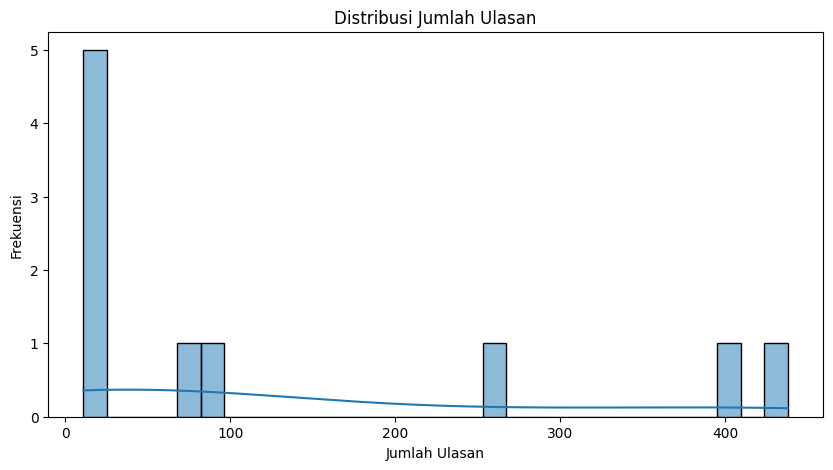

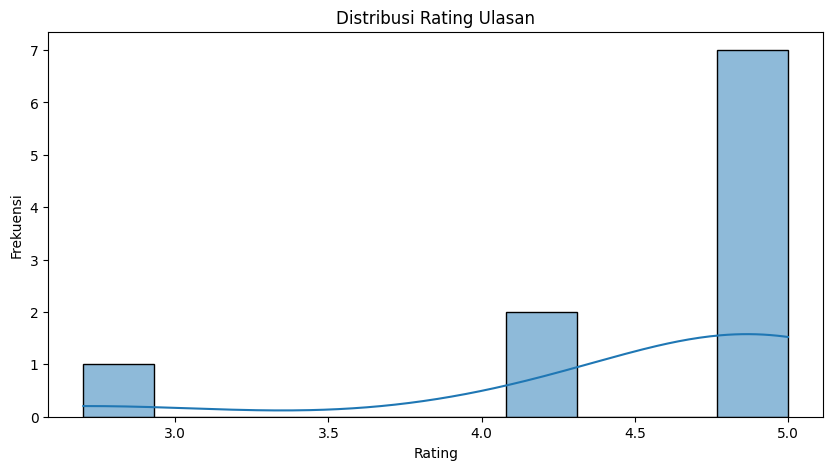

In [915]:
# Histogram review_count
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['review_count'], bins=30, kde=True)
plt.title('Distribusi Jumlah Ulasan')
plt.xlabel('Jumlah Ulasan')
plt.ylabel('Frekuensi')
plt.show()

# Histogram review_rating
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['review_rating'], bins=10, kde=True)
plt.title('Distribusi Rating Ulasan')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.show()

In [916]:
# Menyimpan kriteria bobot
bobot = {
    'review_rating': 0.4,  # Benefit
    'operating_hours_per_week': 0.3,  # Benefit
    'distance_km': 0.3  # Cost
}

In [917]:
# Normalisasi rating review
df['review_rating_norm'] = df['review_rating'] / df['review_rating'].max()

In [918]:
# Menghitung jam operasi per minggu dari kolom open_hours
df['operating_hours_per_week'] = df['open_hours'].apply(lambda x: sum([int(i) for i in x if i.isdigit()]))
df['operating_hours_per_week_norm'] = df['operating_hours_per_week'] / df['operating_hours_per_week'].max()

In [919]:
# Hitung jarak manual antara customer dan tiap laundry dalam kilometer
customer_location = (-8.297434, 114.307957)  # Contoh koordinat lokasi pelanggan
df['distance_km'] = df.apply(lambda row: math.sqrt((row['latitude'] - customer_location[0])**2 + (row['longitude'] - customer_location[1])**2) * 111, axis=1)
df['distance_km_norm'] = df['distance_km'].min() / df['distance_km']  # Normalisasi (Cost)

In [920]:
# Menghitung skor SAW (Simple Additive Weighting)
df['score'] = (bobot['review_rating'] * df['review_rating_norm'] + 
               bobot['operating_hours_per_week'] * df['operating_hours_per_week_norm'] + 
               bobot['distance_km'] * df['distance_km_norm'])

In [921]:
# Menentukan ranking berdasarkan score
df['ranking'] = df['score'].rank(ascending=False)

# Menampilkan hasil dengan kolom yang sudah disesuaikan
df_sorted = df.sort_values(by='score', ascending=False)

# Menampilkan 10 laundry teratas berdasarkan ranking
output_df = df_sorted[['ranking', 'title', 'score', 'review_rating', 'distance_km', 'operating_hours_per_week', 'address']].head(10)
output_df

,ranking,title,score,review_rating,distance_km,operating_hours_per_week,address
5,1.0,Laundry Express Bandung,0.987324,4.9,759.053263,112,"Jl. Pasundan No.58, Balonggede, Regol, Bandung..."
7,2.0,Sorcha Laundry Kosambi (Laundry Antar Jemput B...,0.977305,5.0,757.179273,105,"Jl. Samoja No.8, Samoja, Batununggal, Bandung ..."
2,3.0,Laundry Sendiri,0.970892,4.9,753.141244,105,"Jl. Margasari No.28, Margasari, Buahbatu, Band..."
9,4.0,Amala Express Laundry & Wet Cleaning,0.968483,4.9,759.286338,105,"Jl. Merdeka No.25 - 27, Babakanciamis, Sumurba..."
1,5.0,Chingu Laundry Express,0.967947,4.9,760.668351,105,"Jl. Boscha No.12, Pasteur, Sukajadi, Bandung C..."
3,6.0,Kingwash Laundry,0.959267,5.0,755.362650,98,"Jl. Phh. Mustofa No.127D, Sukapada, Cibeunying..."
4,7.0,Waroenk Laundry Tubagus Ismail,0.939331,4.3,759.035170,112,"Jl. Tubagus Ismail No.10, Sekeloa, Kecamatan C..."
0,8.0,Hade Laundry,0.881248,4.3,756.867443,90,"Jl. Maskumambang No.11, Turangga, Bandung, Ban..."
6,9.0,RN Laundry & Dry Cleaning,0.808522,5.0,757.264333,42,"Mekarsaluyu, Cimenyan, Bandung Regency, West J..."
8,10.0,SANY LAUNDRY PUSAT,0.666000,2.7,747.222082,56,"Ruko Perum Eastern Hills No.1, Cipadung, Cibir..."


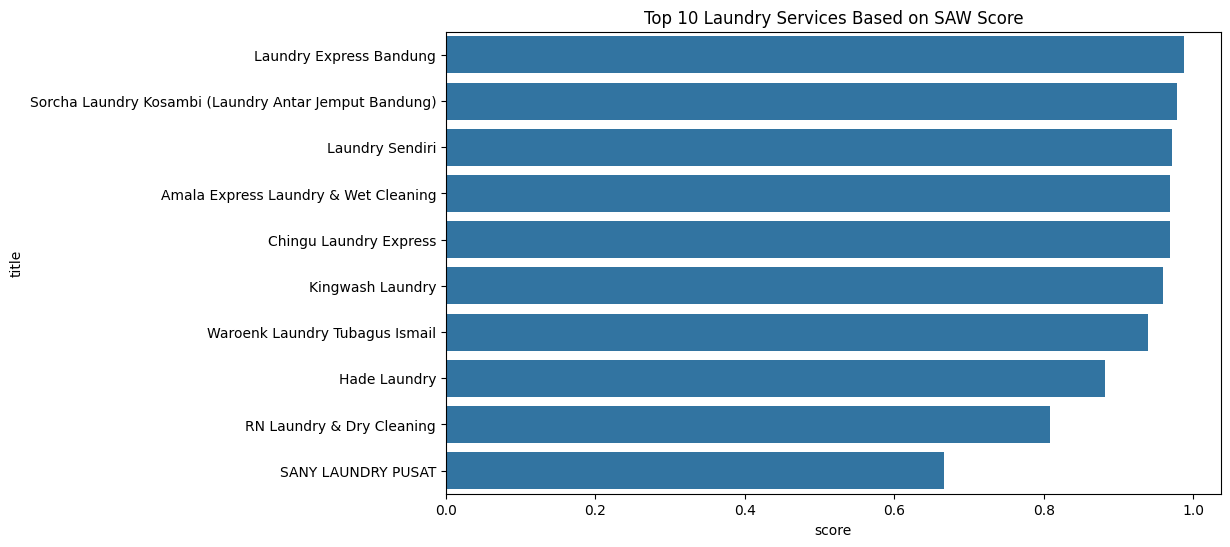

In [922]:
plt.figure(figsize=(10, 6))
sns.barplot(y='title', x='score', data=output_df)
plt.title('Top 10 Laundry Services Based on SAW Score')
plt.show()

In [923]:
# Menyimpan bobot kriteria
bobot = {
    'review_rating': 0.4,  # Benefit
    'operating_hours_per_week': 0.3,  # Benefit
    'distance_km': 0.3  # Cost
}

In [924]:
# Normalisasi rating review (Benefit)
df['review_rating_norm'] = df['review_rating'] / df['review_rating'].max()

In [925]:
# Menghitung jam operasi per minggu dari kolom open_hours
df['operating_hours_per_week'] = df['open_hours'].apply(lambda x: sum([int(i) for i in x if i.isdigit()]))
df['operating_hours_per_week_norm'] = df['operating_hours_per_week'] / df['operating_hours_per_week'].max()

In [926]:
# Hitung jarak manual antara customer dan tiap laundry dalam kilometer
customer_location = (-8.297434, 114.307957)  # Contoh koordinat lokasi pelanggan
df['distance_km'] = df.apply(lambda row: math.sqrt((row['latitude'] - customer_location[0])**2 + (row['longitude'] - customer_location[1])**2) * 111, axis=1)
df['distance_km_norm'] = df['distance_km'].min() / df['distance_km']  # Normalisasi (Cost)

In [927]:
# Menghitung skor WPM
df['score'] = (df['review_rating_norm'] ** bobot['review_rating']) * \
              (df['operating_hours_per_week_norm'] ** bobot['operating_hours_per_week']) * \
              (df['distance_km_norm'] ** bobot['distance_km'])

In [928]:
# Menentukan ranking berdasarkan score
df['ranking'] = df['score'].rank(ascending=False)

# Menampilkan hasil dengan kolom yang sudah disesuaikan
df_sorted = df.sort_values(by='score', ascending=False)

# Menampilkan 10 laundry teratas berdasarkan ranking
output_df = df_sorted[['ranking', 'title', 'score', 'review_rating', 'distance_km', 'operating_hours_per_week', 'address']].head(10)
output_df

,ranking,title,score,review_rating,distance_km,operating_hours_per_week,address
5,1.0,Laundry Express Bandung,0.987288,4.9,759.053263,112,"Jl. Pasundan No.58, Balonggede, Regol, Bandung..."
7,2.0,Sorcha Laundry Kosambi (Laundry Antar Jemput B...,0.976937,5.0,757.179273,105,"Jl. Samoja No.8, Samoja, Batununggal, Bandung ..."
2,3.0,Laundry Sendiri,0.970630,4.9,753.141244,105,"Jl. Margasari No.28, Margasari, Buahbatu, Band..."
9,4.0,Amala Express Laundry & Wet Cleaning,0.968267,4.9,759.286338,105,"Jl. Merdeka No.25 - 27, Babakanciamis, Sumurba..."
1,5.0,Chingu Laundry Express,0.967739,4.9,760.668351,105,"Jl. Boscha No.12, Pasteur, Sukajadi, Bandung C..."
3,6.0,Kingwash Laundry,0.957614,5.0,755.362650,98,"Jl. Phh. Mustofa No.127D, Sukapada, Cibeunying..."
4,7.0,Waroenk Laundry Tubagus Ismail,0.937035,4.3,759.035170,112,"Jl. Tubagus Ismail No.10, Sekeloa, Kecamatan C..."
0,8.0,Hade Laundry,0.878285,4.3,756.867443,90,"Jl. Maskumambang No.11, Turangga, Bandung, Ban..."
6,9.0,RN Laundry & Dry Cleaning,0.742113,5.0,757.264333,42,"Mekarsaluyu, Cimenyan, Bandung Regency, West J..."
8,10.0,SANY LAUNDRY PUSAT,0.634817,2.7,747.222082,56,"Ruko Perum Eastern Hills No.1, Cipadung, Cibir..."


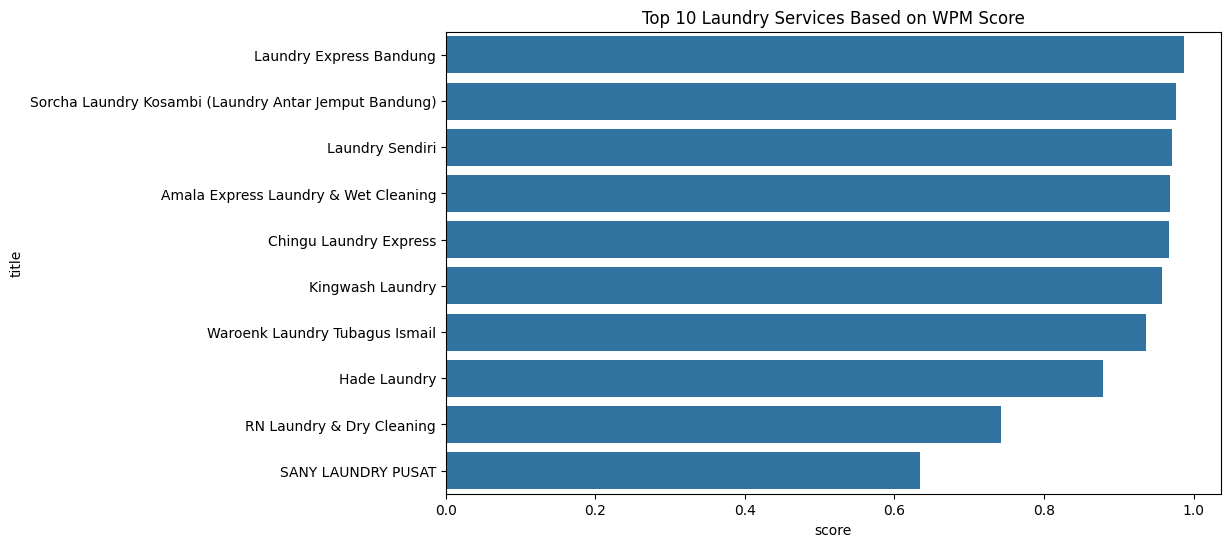

In [929]:
plt.figure(figsize=(10, 6))
sns.barplot(y='title', x='score', data=output_df)
plt.title('Top 10 Laundry Services Based on WPM Score')
plt.show()


In [930]:
# Menyimpan kriteria bobot
bobot = {
    'review_rating': 0.4,  # Benefit
    'operating_hours_per_week': 0.3,  # Benefit (Jam operasi per minggu)
    'distance_km': 0.3  # Cost (jarak dalam km)
}

In [931]:
# Normalisasi rating review
df['review_rating_norm'] = df['review_rating'] / np.sqrt(sum(df['review_rating']**2))

In [932]:
# Menghitung jam operasi per minggu dari kolom open_hours
df['operating_hours_per_week'] = df['open_hours'].apply(lambda x: sum([int(i) for i in x if i.isdigit()]))
df['operating_hours_per_week_norm'] = df['operating_hours_per_week'] / np.sqrt(sum(df['operating_hours_per_week']**2))

In [933]:
# Hitung jarak manual antara customer dan tiap laundry dalam kilometer
customer_location = (-8.297434, 114.307957)  # Contoh koordinat lokasi pelanggan
df['distance_km'] = df.apply(lambda row: math.sqrt((row['latitude'] - customer_location[0])**2 + (row['longitude'] - customer_location[1])**2) * 111, axis=1)
df['distance_km_norm'] = df['distance_km'] / np.sqrt(sum(df['distance_km']**2))

In [934]:
# Menghitung skor MOORA
df['score'] = (bobot['review_rating'] * df['review_rating_norm'] + 
               bobot['operating_hours_per_week'] * df['operating_hours_per_week_norm']) - (
               bobot['distance_km'] * df['distance_km_norm'])

In [935]:
# Menentukan ranking berdasarkan score
df['ranking'] = df['score'].rank(ascending=False)

# Menampilkan hasil dengan kolom yang sudah disesuaikan
df_sorted = df.sort_values(by='score', ascending=False)

# Menampilkan 10 laundry teratas berdasarkan ranking
output_df = df_sorted[['ranking', 'title', 'score', 'review_rating', 'distance_km', 'operating_hours_per_week', 'address']].head(10)
output_df

,ranking,title,score,review_rating,distance_km,operating_hours_per_week,address
5,1.0,Laundry Express Bandung,0.149290,4.9,759.053263,112,"Jl. Pasundan No.58, Balonggede, Regol, Bandung..."
7,2.0,Sorcha Laundry Kosambi (Laundry Antar Jemput B...,0.145319,5.0,757.179273,105,"Jl. Samoja No.8, Samoja, Batununggal, Bandung ..."
2,3.0,Laundry Sendiri,0.143100,4.9,753.141244,105,"Jl. Margasari No.28, Margasari, Buahbatu, Band..."
9,4.0,Amala Express Laundry & Wet Cleaning,0.142329,4.9,759.286338,105,"Jl. Merdeka No.25 - 27, Babakanciamis, Sumurba..."
1,5.0,Chingu Laundry Express,0.142156,4.9,760.668351,105,"Jl. Boscha No.12, Pasteur, Sukajadi, Bandung C..."
3,6.0,Kingwash Laundry,0.138616,5.0,755.362650,98,"Jl. Phh. Mustofa No.127D, Sukapada, Cibeunying..."
4,7.0,Waroenk Laundry Tubagus Ismail,0.132936,4.3,759.035170,112,"Jl. Tubagus Ismail No.10, Sekeloa, Kecamatan C..."
0,8.0,Hade Laundry,0.111423,4.3,756.867443,90,"Jl. Maskumambang No.11, Turangga, Bandung, Ban..."
6,9.0,RN Laundry & Dry Cleaning,0.082927,5.0,757.264333,42,"Mekarsaluyu, Cimenyan, Bandung Regency, West J..."
8,10.0,SANY LAUNDRY PUSAT,0.035350,2.7,747.222082,56,"Ruko Perum Eastern Hills No.1, Cipadung, Cibir..."


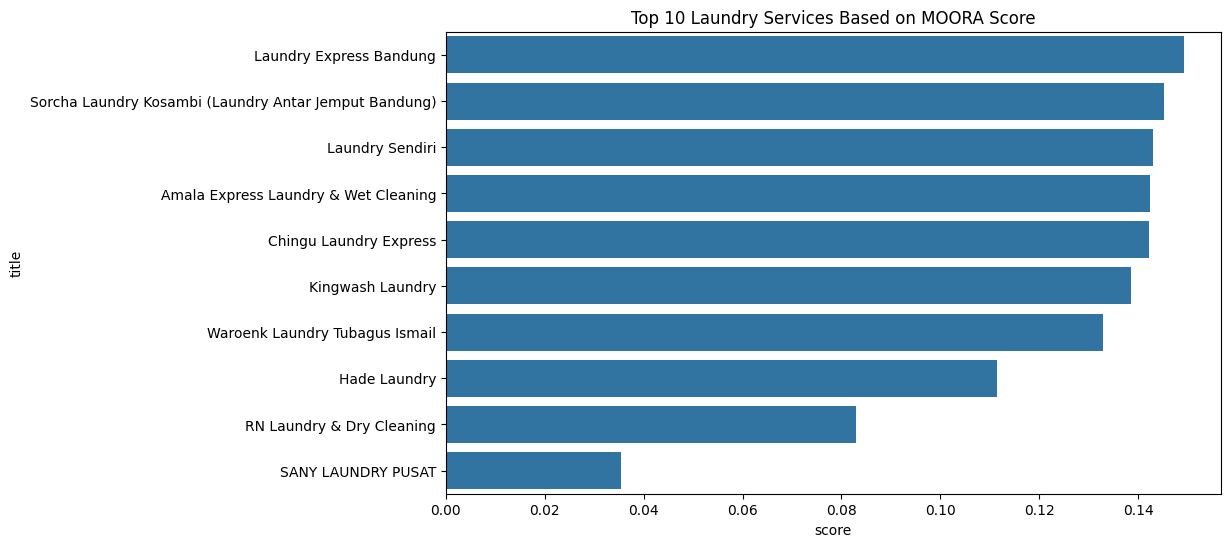

In [936]:
plt.figure(figsize=(10, 6))
sns.barplot(y='title', x='score', data=output_df)
plt.title('Top 10 Laundry Services Based on MOORA Score')
plt.show()

In [937]:
# Menyimpan bobot kriteria
bobot = {
    'review_rating': 0.4,  # Benefit
    'operating_hours_per_week': 0.3,  # Benefit
    'distance_km': 0.3  # Cost
}

In [938]:
# Normalisasi rating review (Benefit)
df['review_rating_norm'] = df['review_rating'] / np.sqrt(np.sum(df['review_rating']**2))

In [939]:
# Menghitung jam operasi per minggu dari kolom open_hours
df['operating_hours_per_week'] = df['open_hours'].apply(lambda x: sum([int(i) for i in x if i.isdigit()]))
df['operating_hours_per_week_norm'] = df['operating_hours_per_week'] / np.sqrt(np.sum(df['operating_hours_per_week']**2))

In [940]:
# Hitung jarak manual antara customer dan tiap laundry dalam kilometer
customer_location = (-8.297434, 114.307957)  # Contoh koordinat lokasi pelanggan
df['distance_km'] = df.apply(lambda row: math.sqrt((row['latitude'] - customer_location[0])**2 + (row['longitude'] - customer_location[1])**2) * 111, axis=1)
df['distance_km_norm'] = df['distance_km'] / np.sqrt(np.sum(df['distance_km']**2))  # Normalisasi (Cost)

In [941]:
# Normalisasi terbobot (Weighted Normalization)
df['review_rating_weighted'] = df['review_rating_norm'] * bobot['review_rating']
df['operating_hours_weighted'] = df['operating_hours_per_week_norm'] * bobot['operating_hours_per_week']
df['distance_km_weighted'] = df['distance_km_norm'] * bobot['distance_km']

In [942]:
# Menentukan solusi ideal dan solusi negatif ideal
ideal_solution = {
    'review_rating': df['review_rating_weighted'].max(),
    'operating_hours_per_week': df['operating_hours_weighted'].max(),
    'distance_km': df['distance_km_weighted'].min()
}

negative_ideal_solution = {
    'review_rating': df['review_rating_weighted'].min(),
    'operating_hours_per_week': df['operating_hours_weighted'].min(),
    'distance_km': df['distance_km_weighted'].max()
}

In [943]:
# Menghitung jarak ke solusi ideal dan solusi negatif ideal
df['distance_to_ideal'] = np.sqrt(
    (df['review_rating_weighted'] - ideal_solution['review_rating'])**2 +
    (df['operating_hours_weighted'] - ideal_solution['operating_hours_per_week'])**2 +
    (df['distance_km_weighted'] - ideal_solution['distance_km'])**2
)

df['distance_to_negative_ideal'] = np.sqrt(
    (df['review_rating_weighted'] - negative_ideal_solution['review_rating'])**2 +
    (df['operating_hours_weighted'] - negative_ideal_solution['operating_hours_per_week'])**2 +
    (df['distance_km_weighted'] - negative_ideal_solution['distance_km'])**2
)

In [944]:
# Menghitung kedekatan relatif terhadap solusi ideal
df['kedekatan_relatif'] = df['distance_to_negative_ideal'] / (df['distance_to_ideal'] + df['distance_to_negative_ideal'])


In [945]:
# Menghitung kedekatan relatif terhadap solusi ideal
df['kedekatan_relatif'] = df['distance_to_negative_ideal'] / (df['distance_to_ideal'] + df['distance_to_negative_ideal'])

# Menentukan ranking berdasarkan kedekatan relatif
df['ranking'] = df['kedekatan_relatif'].rank(ascending=False)

# Menampilkan hasil dengan kolom yang sudah disesuaikan
df_sorted = df.sort_values(by='kedekatan_relatif', ascending=False)

# Menampilkan 10 laundry teratas berdasarkan ranking
output_df = df_sorted[['ranking', 'title', 'kedekatan_relatif', 'review_rating', 'distance_km', 'operating_hours_per_week', 'address']].head(10)
output_df

,ranking,title,kedekatan_relatif,review_rating,distance_km,operating_hours_per_week,address
5,1.0,Laundry Express Bandung,0.967248,4.9,759.053263,112,"Jl. Pasundan No.58, Balonggede, Regol, Bandung..."
7,2.0,Sorcha Laundry Kosambi (Laundry Antar Jemput B...,0.926244,5.0,757.179273,105,"Jl. Samoja No.8, Samoja, Batununggal, Bandung ..."
2,3.0,Laundry Sendiri,0.920393,4.9,753.141244,105,"Jl. Margasari No.28, Margasari, Buahbatu, Band..."
9,4.0,Amala Express Laundry & Wet Cleaning,0.919262,4.9,759.286338,105,"Jl. Merdeka No.25 - 27, Babakanciamis, Sumurba..."
1,5.0,Chingu Laundry Express,0.918907,4.9,760.668351,105,"Jl. Boscha No.12, Pasteur, Sukajadi, Bandung C..."
3,6.0,Kingwash Laundry,0.857585,5.0,755.362650,98,"Jl. Phh. Mustofa No.127D, Sukapada, Cibeunying..."
4,7.0,Waroenk Laundry Tubagus Ismail,0.810564,4.3,759.035170,112,"Jl. Tubagus Ismail No.10, Sekeloa, Kecamatan C..."
0,8.0,Hade Laundry,0.689984,4.3,756.867443,90,"Jl. Maskumambang No.11, Turangga, Bandung, Ban..."
6,9.0,RN Laundry & Dry Cleaning,0.474910,5.0,757.264333,42,"Mekarsaluyu, Cimenyan, Bandung Regency, West J..."
8,10.0,SANY LAUNDRY PUSAT,0.142986,2.7,747.222082,56,"Ruko Perum Eastern Hills No.1, Cipadung, Cibir..."


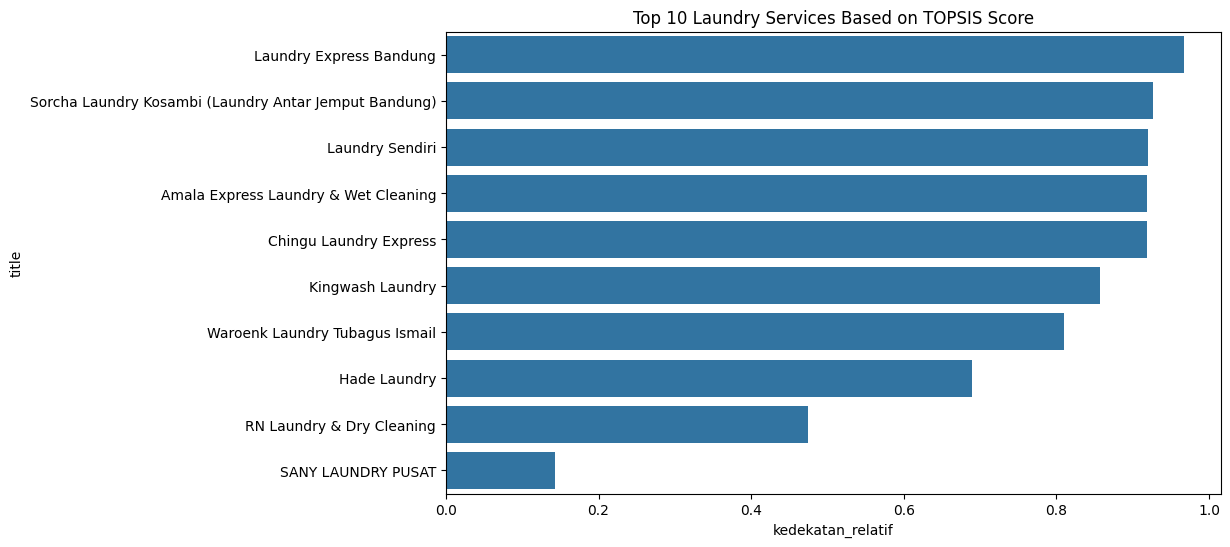

In [946]:
plt.figure(figsize=(10, 6))
sns.barplot(y='title', x='kedekatan_relatif', data=output_df)
plt.title('Top 10 Laundry Services Based on TOPSIS Score')
plt.show()